# Trabajo Pr√°ctico 1 - Procesamiento de Im√°genes

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import os
from skimage.metrics import peak_signal_noise_ratio as psnr

## 1. Modos de color en im√°genes

In [16]:
def printImg(img, gray = False, hsv = False):
    if gray == True:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)
    elif hsv:
        plt.imshow(img)
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()
    
def readImg(path):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

### Ejercicio 6

> La conversi√≥n de una imagen de color a escala de grises se puede hacer de varias formas. El ejercicio consiste en convertir la imagen de Lenna color a escala de grises utilizando diferentes metodos.



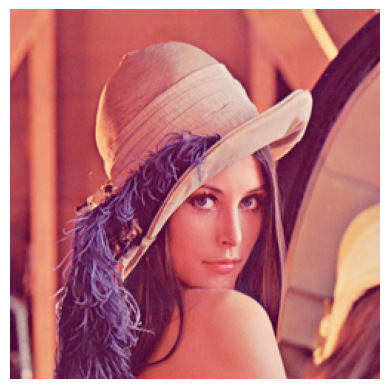

In [17]:
imagen_lenna = readImg('./imagenes/Lenna.png')

if imagen_lenna is None:
    print("Error al cargar la imagen.")
else:
    printImg(imagen_lenna)

#### M√©todo 1
<a id='e1-6a'></a>
> Usando la libreria cv2 y el m√©todo cvtColor()



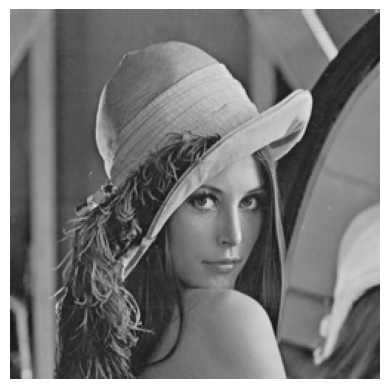

In [18]:
imagen_lenna = cv2.imread('./imagenes/Lenna.png', cv2.COLOR_BGR2RGB)

if imagen_lenna is not None:
  imagen_lenna_gris = cv2.cvtColor(imagen_lenna, cv2.COLOR_RGB2GRAY)
  printImg(imagen_lenna_gris,gray = True)
else:
    print("Error: imagen_lenna no se ha cargado correctamente.")

#### M√©todo 2

> Usando la f√≥rmula de luminancia

Seg√∫n https://www.uv.es/gpoei/eng/Pfc_web/generalidades/grises/grey.htm, la ecuaci√≥n a utilizar es $Y = R*0.3+G*0.59+B*0.11$.



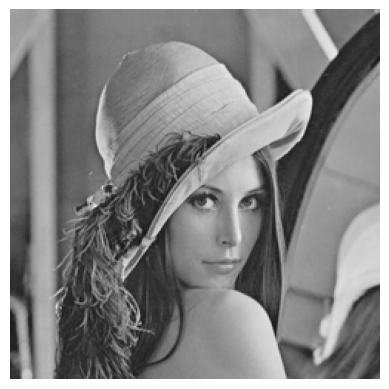

In [19]:
if imagen_lenna is not None:
  b, g, r = cv2.split(imagen_lenna)

  imagen_lenna_gris_luminancia = 0.3 * r + 0.59 * g + 0.11 * b
  imagen_lenna_gris_luminancia = imagen_lenna_gris_luminancia.astype(np.uint8)

  printImg(imagen_lenna_gris_luminancia, gray=True)

else:
    print("Error: imagen_lenna no se ha cargado correctamente.")


#### M√©todo 3

> Usando scickit-image y el m√©todo rgb2gray()

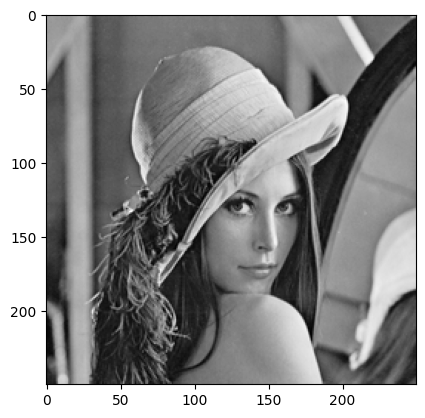

In [20]:
if imagen_lenna is not None:
  imagen_lenna_rgb = cv2.cvtColor(imagen_lenna, cv2.COLOR_BGR2RGB)
  imagen_lenna_gris_scikit = rgb2gray(imagen_lenna_rgb)
  plt.imshow(imagen_lenna_gris_scikit, cmap='gray')
  plt.show()
else:
    print("Error: imagen_lenna no se ha cargado correctamente.")


#### Pregunta 1


> ¬øQu√© pasa con los canales?

In [21]:
if imagen_lenna is not None:
  print("Imagen Lenna (color):", imagen_lenna.shape)
  print("Imagen Lenna en escala de grises (cv2.cvtColor):", imagen_lenna_gris.shape)
  print("Imagen Lenna en escala de grises (Luminancia):", imagen_lenna_gris_luminancia.shape)
  print("Imagen Lenna en escala de grises (scikit-image):", imagen_lenna_gris_scikit.shape)
else:
    print("Error: imagen_lenna no se ha cargado correctamente.")


Imagen Lenna (color): (250, 250, 3)
Imagen Lenna en escala de grises (cv2.cvtColor): (250, 250)
Imagen Lenna en escala de grises (Luminancia): (250, 250)
Imagen Lenna en escala de grises (scikit-image): (250, 250)


Como es posible observar, la imagen original conserva sus tres canales (BGR) mientras que las versiones en escalas en grises poseen un √∫nico canal.

#### Pregunta 2

>  ¬øQu√© profundidad de bits tiene la imagen?

In [22]:
if imagen_lenna is not None:
  print("Profundidad de color de la imagen Lenna (color):", imagen_lenna.dtype)
  print("Profundidad de color de la imagen Lenna en escala de grises (cv2.cvtColor):", imagen_lenna_gris.dtype)
  print("Profundidad de color de la imagen Lenna en escala de grises (Luminancia):", imagen_lenna_gris_luminancia.dtype)
  print("Profundidad de color de la imagen Lenna en escala de grises (scikit-image):", imagen_lenna_gris_scikit.dtype)
else:
    print("Error: imagen_lenna no se ha cargado correctamente.")


Profundidad de color de la imagen Lenna (color): uint8
Profundidad de color de la imagen Lenna en escala de grises (cv2.cvtColor): uint8
Profundidad de color de la imagen Lenna en escala de grises (Luminancia): uint8
Profundidad de color de la imagen Lenna en escala de grises (scikit-image): float64


La imagen a color tiene una profundidad de 24 bits, 8 por cada canal.

Las dos primeras im√°genes en escala de grises tienen una profundidad de 8 bits, un √∫nico canal.

La √∫ltima imagen est√° en formato `float64`, lo que indica una profundidad de 64 bits en punto flotante.

### Ejercicio 7

> Convertir la imagen de Lenna a otros modos de color, como CMYK, HSV, HSL. Mostrar el
resultado.

Imagen original (RGB):


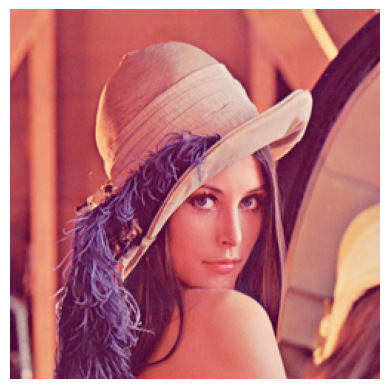

Imagen en HSV:


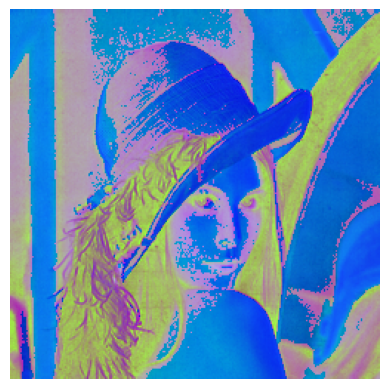

Imagen en HSL:


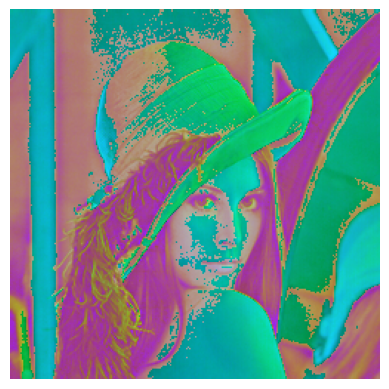

Imagen en CMYK:


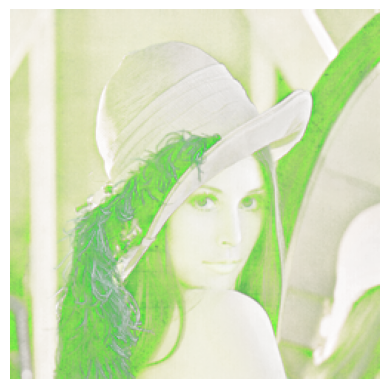

In [ ]:
imagen_lenna = readImg('./imagenes/Lenna.png')

if imagen_lenna is not None:
    # Mostrar imagen original
    print("Imagen original (RGB):")
    printImg(imagen_lenna)

    # Convertir a HSV
    imagen_hsv = cv2.cvtColor(imagen_lenna, cv2.COLOR_RGB2HSV)
    print("Imagen en HSV:")
    printImg(imagen_hsv,hsv=True)

    # Convertir a HSL
    imagen_hsl = cv2.cvtColor(imagen_lenna, cv2.COLOR_RGB2HLS)
    print("Imagen en HSL:")
    printImg(imagen_hsl)

    # Normalizar imagen BGR a rango [0, 1]
    bgr_normalized = imagen_lenna.astype(float) / 255.0
    b = bgr_normalized[:, :, 0]
    g = bgr_normalized[:, :, 1]
    r = bgr_normalized[:, :, 2]

    # Calcular el componente K
    k = 1 - np.max(bgr_normalized, axis=2)

    # Evitar divisi√≥n por cero
    c = (1 - r - k) / (1 - k + 1e-10)
    m = (1 - g - k) / (1 - k + 1e-10)
    y = (1 - b - k) / (1 - k + 1e-10)

    # Unir canales y escalar a 255 para visualizaci√≥n
    cmyk = np.stack((c, m, y, k), axis=2)
    cmyk_image = (cmyk*255).astype(np.uint8)

    # Mostrar la imagen CMYK
    print("Imagen en CMYK:")
    printImg(cmyk_image)

else:
    print("Error: imagen_lenna no se ha cargado correctamente.")

### Ejercicio 8

> Tomar la imagen convertida en escala de grises y volver a convertir al en modo RGB. ¬øQu√© ha sucedido?

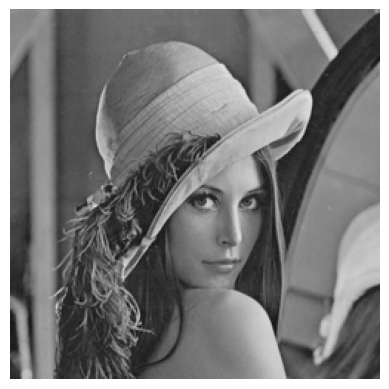

In [24]:
if imagen_lenna is not None:
  imagen_lenna_gris_a_rgb = cv2.cvtColor(imagen_lenna_gris, cv2.COLOR_GRAY2RGB)

  printImg(imagen_lenna_gris_a_rgb)
else:
    print("Error: imagen_lenna no se ha cargado correctamente.")


In [25]:
imagen_lenna_gris_a_rgb.shape

(250, 250, 3)

Parece que la imagen tiene tres canales ahora, pero no se ha convertido en una imagen a color como podr√≠a pensarse.

Luego de investigar, se puede concluir que, en realidad, lo que se hace es replicar el √∫nico canal de la imagen en tres canales iguales.

In [26]:
if imagen_lenna is not None:
  b, g, r = cv2.split(imagen_lenna_gris_a_rgb)
  if np.array_equal(b, g) and np.array_equal(g, r):
      print("Los canales de la imagen tienen los mismos valores.")
  else:
      print("Los canales de la imagen NO tienen los mismos valores.")
else:
    print("Error: imagen_lenna no se ha cargado correctamente.")


Los canales de la imagen tienen los mismos valores.


## 2. Compresi√≥n de Im√°genes

### Ejercicio 2

> Dar detalles de las siguientes m√©tricas de calidad de compresi√≥n (PSNR, SSIM)

- PSNR (Peak Signal-to-Noise Ratio)

M√©trica que mide la diferencia promedio entre la imagen original y la comprimida. Basada en el error cuadr√°tico medio.
Tiene la siguiente f√≥rmula:

$$PSNR = 10 \cdot \log_{10}\left(\frac{MAX^2}{MSE}\right)$$

$$\text{MAX es el valor m√°ximo posible de un p√≠xel (255 en im√°genes de 8 bits).}$$

$$\text{MSE es el error cuadr√°tico medio entre las dos im√°genes.}$$

Si se tienen valores mayores de 40, se considera una calidad de compresi√≥n muy buena, casi sin p√©rdida. Si se encuentran entre 30 y 40, se la considera buena. Si esta entre 20 y 30, regular con una visible p√©rdida. Si es menor de 20 se la considera mala.

Tiene el inconveniente de que no considera como percibe el ojo humano la imagen.

<br><br>
- SSIM (Structural Similarity Index)

M√©trica que eval√∫a la similitud estructural entre dos im√°genes, teniendo en cuenta la luz y el contraste. Se aproxima mucho mejor a c√≥mo percibimos la calidad bisual las personas.

Si el valor es cercano a 1 significa que las im√°genes son muy similares, si es cercano a 0 implica que son muy distintas.

Su f√≥rmula es mucho m√°s compleja que la anterior:

$$ SSIM(x, y) = \frac{(2\mu_x \mu_y + C_1)(2\sigma_{xy} + C_2)}{(\mu_x^2 + \mu_y^2 + C_1)(\sigma_x^2 + \sigma_y^2 + C_2)}$$

$$\mu_x, \mu_y: \text{medias de las im√°genes x e y}$$
$$\sigma_x^2, \sigma_y^2: \text{varianzas}$$
$$\sigma_{xy}: \text{covarianza entre x e y}$$
$$C_1, C_2: \text{constantes peque√±as para evitar divisi√≥n por cero}$$

### Ejercicio 6

> Implementar un modelo de compresi√≥n basado en codificaci√≥n Run-Length Encoding (RLE). El algoritmo Run-Length Encoding (RLE) reduce el tama√±o de una imagen representando secuencias consecutivas de p√≠xeles id√©nticos como una sola entrada. Para ello convertir una imagen en escala de grises. Luego, implementar el algoritmo RLE para comprimir la imagen. Posteriormente, implementar
una funci√≥n para descomprimir la imagen. Al finalizar, mostrar la imagen original y la imagen reconstruida. Probar con dos o tres imagenes que tengan diferentes caracter√≠sticas, modos de color. Utilizar alguna de las metricas nombradas anteriormente e evaluar el resultado de la misma.


üìÇ Imagen: ./imagenes/Lenna.png
üìè Dimensiones: (250, 250)
üóúÔ∏è Tama√±o original (memoria): 62500 p√≠xeles
üíæ Tama√±o en disco original: 110.42 KB
üóÇÔ∏è Tama√±o comprimido: 56748 pares (valor, cantidad)
üì¶ Tama√±o estimado RLE: 110.84 KB
üìä PSNR entre original y reconstruida: inf dB


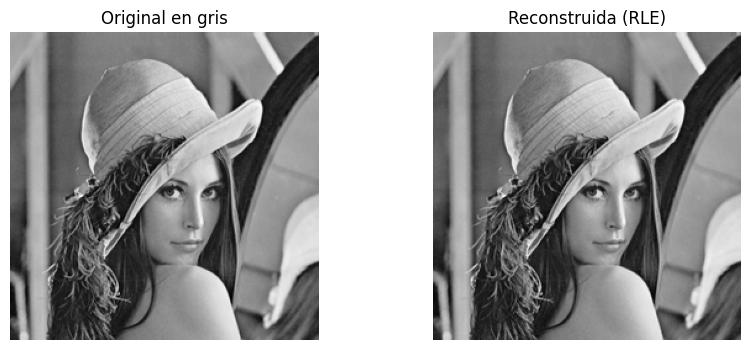


üìÇ Imagen: ./imagenes/paisaje2.jpg
üìè Dimensiones: (350, 350)
üóúÔ∏è Tama√±o original (memoria): 122500 p√≠xeles
üíæ Tama√±o en disco original: 34.88 KB
üóÇÔ∏è Tama√±o comprimido: 114758 pares (valor, cantidad)
üì¶ Tama√±o estimado RLE: 224.14 KB
üìä PSNR entre original y reconstruida: inf dB


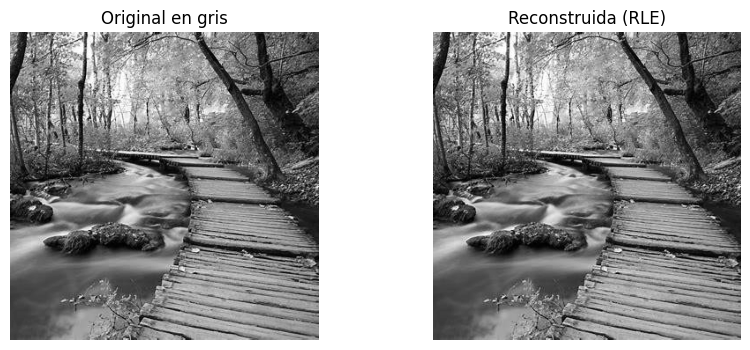


üìÇ Imagen: ./imagenes/img_color1.png
üìè Dimensiones: (300, 300)
üóúÔ∏è Tama√±o original (memoria): 90000 p√≠xeles
üíæ Tama√±o en disco original: 61.48 KB
üóÇÔ∏è Tama√±o comprimido: 14400 pares (valor, cantidad)
üì¶ Tama√±o estimado RLE: 28.12 KB
üìä PSNR entre original y reconstruida: inf dB


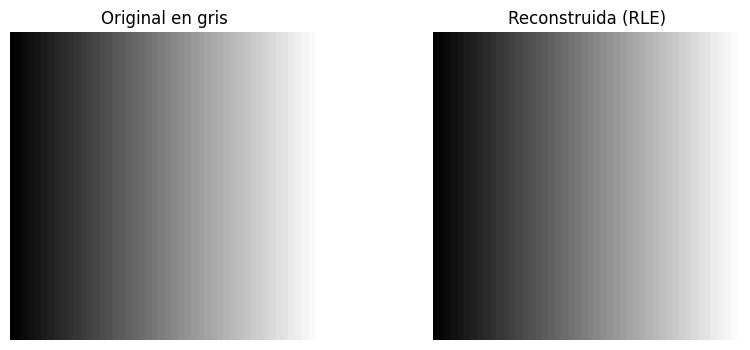

In [27]:
# Funci√≥n RLE de compresi√≥n
def rle_encode(img):
    pixels = img.flatten()
    encoded = []
    count = 1
    for i in range(1, len(pixels)):
        if pixels[i] == pixels[i - 1]:
            count += 1
        else:
            encoded.append((pixels[i - 1], count))
            count = 1
    encoded.append((pixels[-1], count))
    return encoded

# Funci√≥n RLE de decompresi√≥n
def rle_decode(encoded, shape):
    pixels = []
    for value, count in encoded:
        pixels.extend([value] * count)
    return np.array(pixels, dtype=np.uint8).reshape(shape)

# Procesador
def procesar_imagen(path):
    # Cargar imagen y convertir a escala de grises
    original_color = cv2.imread(path)
    original_gray = cv2.cvtColor(original_color, cv2.COLOR_BGR2GRAY)

    # Codificar y decodificar
    comprimida = rle_encode(original_gray)
    reconstruida = rle_decode(comprimida, original_gray.shape)

    # Calcular PSNR
    valor_psnr = psnr(original_gray, reconstruida)

    # Tama√±o en disco de la imagen original
    tamano_original_kb = os.path.getsize(path) / 1024

    # Tama√±o estimado del archivo comprimido (2 bytes por par)
    tamano_rle_kb = (len(comprimida) * 2) / 1024

    # Mostrar resultados
    print(f"\nüìÇ Imagen: {path}")
    print(f"üìè Dimensiones: {original_gray.shape}")
    print(f"üóúÔ∏è Tama√±o original (memoria): {original_gray.size} p√≠xeles")
    print(f"üíæ Tama√±o en disco original: {tamano_original_kb:.2f} KB")
    print(f"üóÇÔ∏è Tama√±o comprimido: {len(comprimida)} pares (valor, cantidad)")
    print(f"üì¶ Tama√±o estimado RLE: {tamano_rle_kb:.2f} KB")
    print(f"üìä PSNR entre original y reconstruida: {valor_psnr:.2f} dB")

    # Mostrar im√°genes
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title('Original en gris')
    plt.imshow(original_gray, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Reconstruida (RLE)')
    plt.imshow(reconstruida, cmap='gray')
    plt.axis('off')

    plt.show()

# Lista de im√°genes para procesar
imagenes = [
    './imagenes/Lenna.png',
    './imagenes/paisaje2.jpg',
    './imagenes/img_color1.png'
]

for img_path in imagenes:
    procesar_imagen(img_path)

A partir de la implementaci√≥n del algoritmo de compresi√≥n RLE, se puede observar que su eficacia var√≠a significativamente seg√∫n las caracter√≠sticas de la imagen. En el caso de la imagen `img_color1.png`, se logr√≥ una reducci√≥n considerable del tama√±o, pasando de 61.48 KB a un estimado de 28.12 KB, lo que indica que conten√≠a muchas secuencias repetidas de p√≠xeles, haciendo que la compresi√≥n sea efectiva. En cambio, las im√°genes `Lenna.png` y `paisaje2.jpg` mostraron un comportamiento opuesto: el tama√±o estimado tras la compresi√≥n fue igual o incluso mayor al tama√±o en disco original, debido a la falta de patrones repetitivos evidentes, lo que demuestra que RLE no es adecuado para im√°genes con alta variabilidad tonal o detalles complejos.

Por otro lado, el valor de PSNR (infinito) entre la imagen original y la reconstruida en todos los casos confirma que la reconstrucci√≥n es perfecta, es decir, no se pierde calidad en el proceso.